In [4]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 40)

### Step-1: Reading and Understanding Data

In [5]:
bikeRental = pd.read_csv('day.csv')
bikeRental

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
# weekday for dteday (01-01-2018) is 6. Let's try to understand which day does 6 corresponds to 
from datetime import datetime
print('01-01-2018 ->',datetime.strptime('01-01-2018',"%d-%m-%Y").strftime('%A'),' -> weekday 6')
print('02-01-2018 ->',datetime.strptime('02-01-2018',"%d-%m-%Y").strftime('%A'),' -> weekday 0')

#We will use this information in the upcoming steps when we create dummy features

01-01-2018 -> Monday  -> weekday 6
02-01-2018 -> Tuesday  -> weekday 0


In [7]:
bikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Shape of the dataset is 730 Rows and 16 Columns. And there are no null values in any of the columns.

### Step-2: Cleaning Data
    a. Fixing Columns
    b. Fixing Rows
    c. Fixing Missing Values
    
From the data description mentioned and also from the data, we can observe that the columns casual and registered are highly correlated to the target variable "cnt"
So, we will drop *casual* and *registered* variables

In [8]:
bikeRental.drop(['casual','registered'],axis=1, inplace=True)
bikeRental

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
#we can also ignore the dteday column as the information that is from that column has been already extracted out like yr, mnth, weekday, etc...
bikeRental.drop(['dteday'],axis=1,inplace=True)

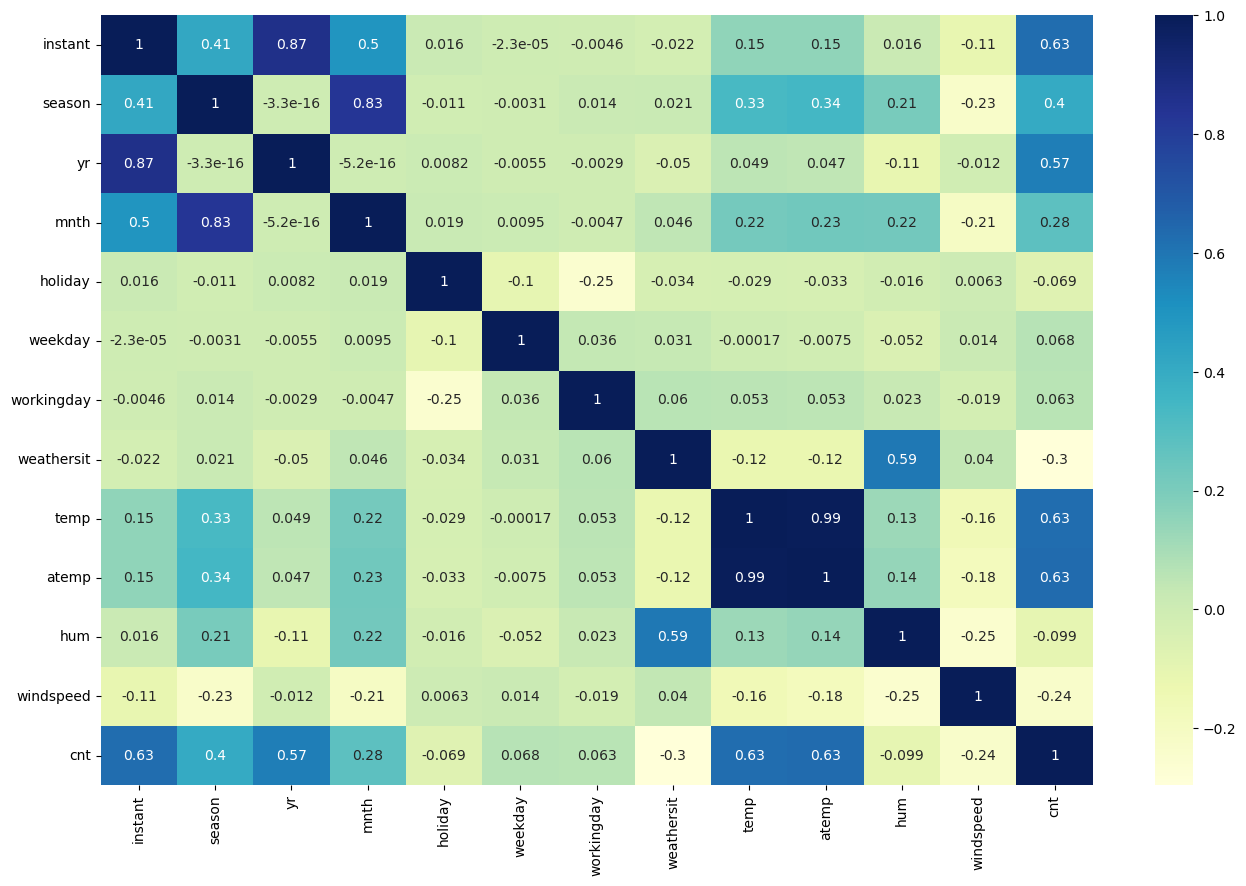

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikeRental.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [11]:
# we can also ignore one of temp, atemp as the correlation is almost 1
# we will also instant column since its also not useful
bikeRental.drop(['instant','temp'],axis=1,inplace=True)
bikeRental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [12]:
bikeRental.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values. As observed before in the info tile and above, there are no null values.

In [13]:
bikeRental.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


In [14]:
bikeRental.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

<p>As we can see from the above two cells, the variables atemp, hum, windspeed and cnt are numerical types</p>
<p>And other variables like season, yr, mnth, holiday, weekday, workingday, weathersit are categorical type </p>

Let's divide the columns as numerical & categorical <br>
&nbsp; num_cols = ['atemp','hum','windspeed','cnt'] <br>
&nbsp; cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit'] <br>

    d. Standardizing Values (Remove Outliers):

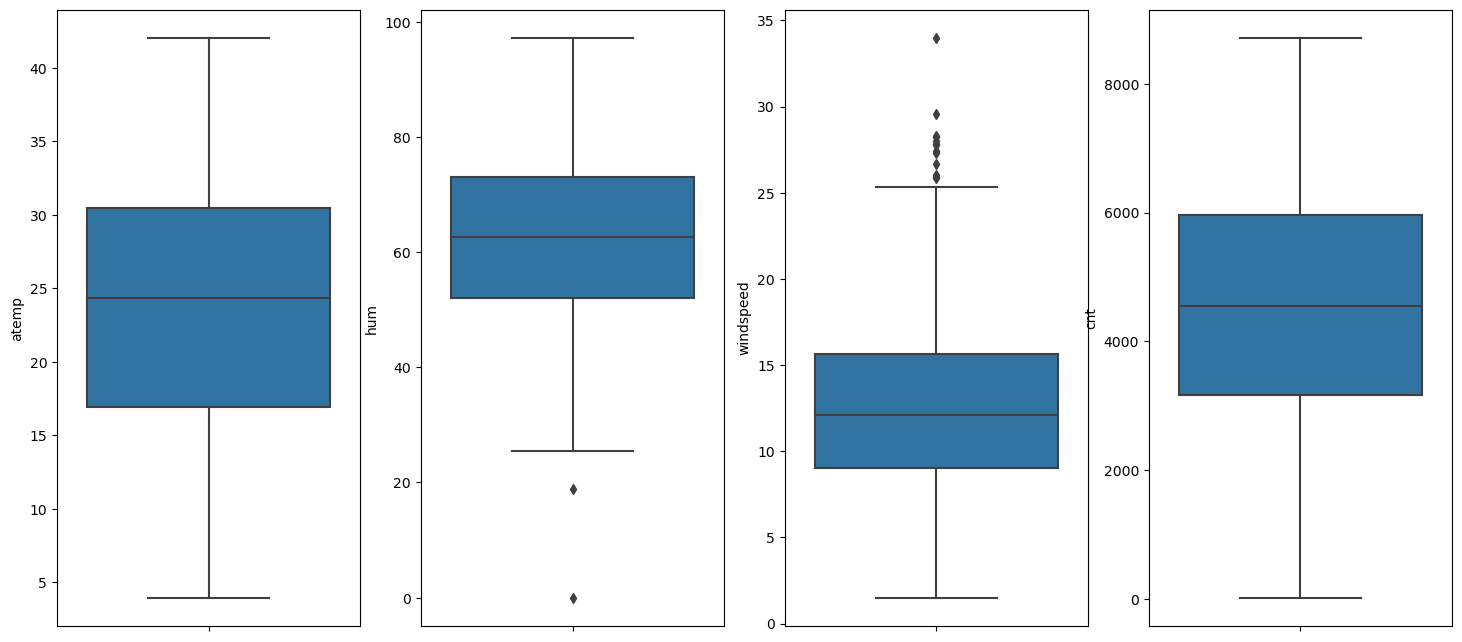

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(18,8))
sns.boxplot(y='atemp',data=bikeRental,ax = axs[0])
sns.boxplot(y='hum',data=bikeRental,ax = axs[1])
sns.boxplot(y='windspeed',data=bikeRental,ax = axs[2])
sns.boxplot(y='cnt',data=bikeRental,ax = axs[3])
plt.show()

_`Inference`_: There aren't major outliers, so no need to remove any data

### Step-3: Analysis
    i.   Univariate Analysis
    ii.  Bivariate Analysis

Since we are interested in the determing the number of riders, our target variable (y-var) will be "cnt"

In [16]:
num_cols=['atemp','hum','windspeed','cnt']
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

<Figure size 1800x800 with 0 Axes>

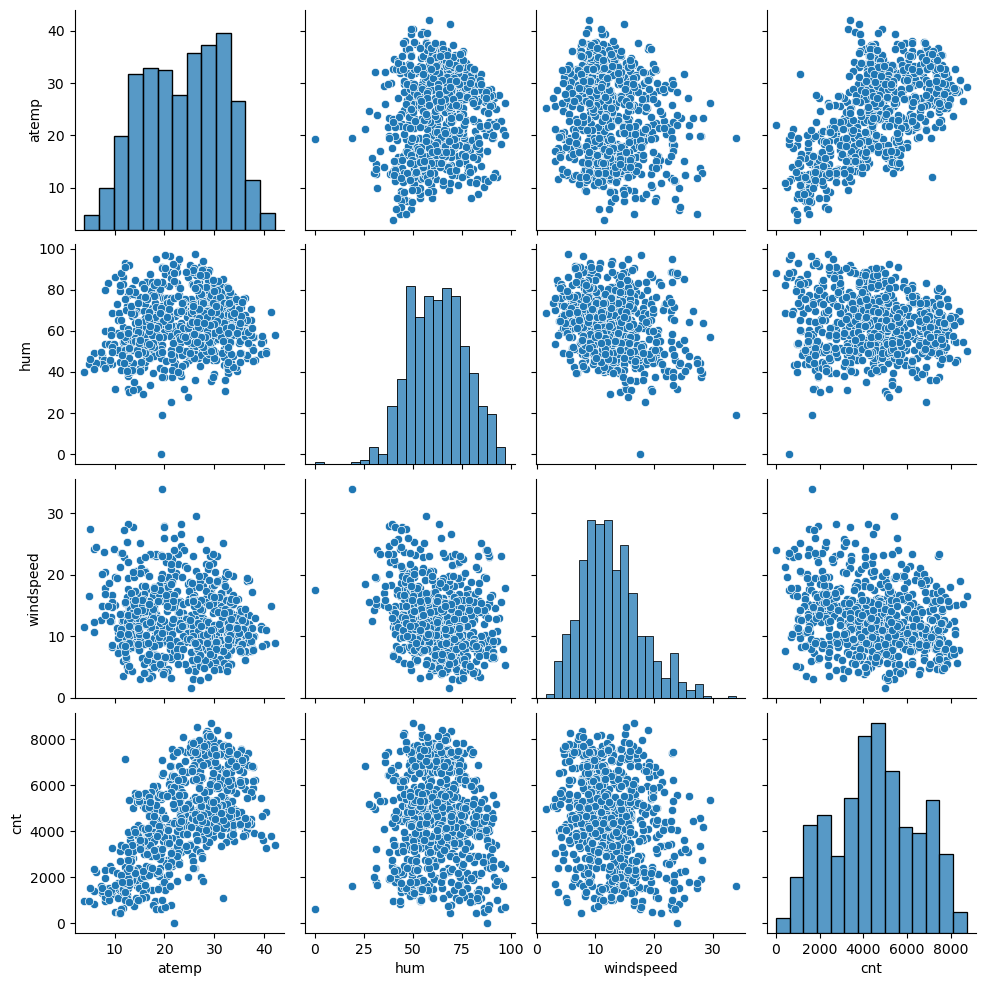

In [17]:
plt.figure(figsize=(18,8))
sns.pairplot(bikeRental[num_cols])
plt.show()

_`Inferences`_:
1. We can see that there is a clear linear relation between cnt and atemp
2. There is also some relationship between humidity and windspeed with count

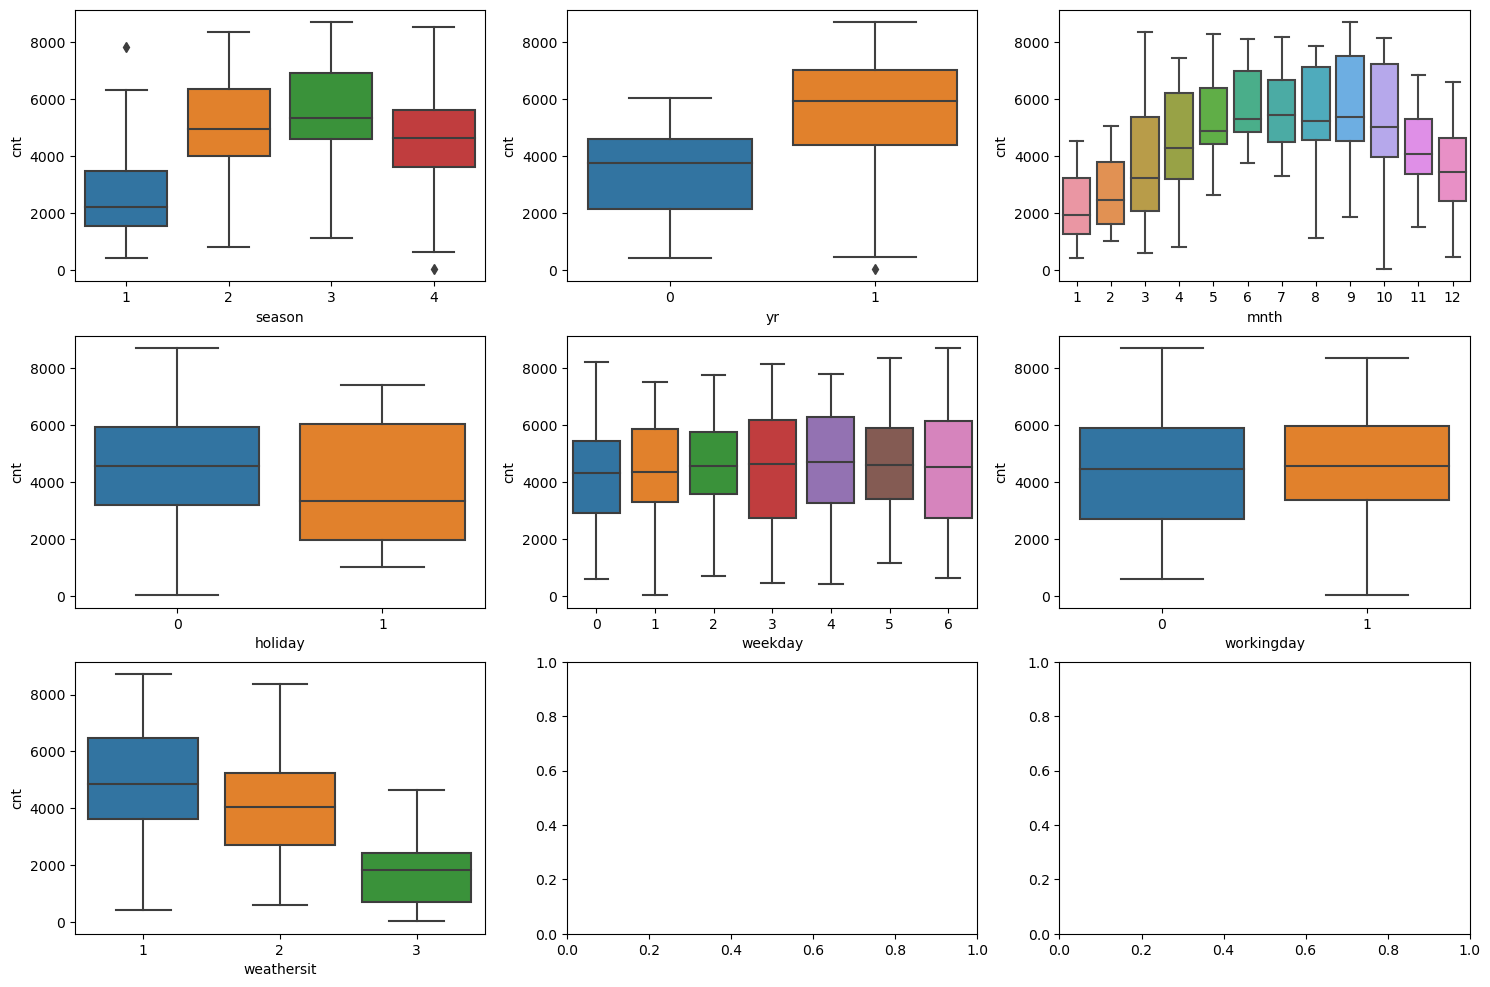

In [18]:
# cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

fig, axs = plt.subplots(3, 3, figsize=(18,12))
sns.boxplot(x='season',y='cnt',data=bikeRental,ax = axs[0][0])
sns.boxplot(x='yr',y='cnt',data=bikeRental,ax = axs[0][1])
sns.boxplot(x='mnth',y='cnt',data=bikeRental,ax = axs[0][2])
sns.boxplot(x='holiday',y='cnt',data=bikeRental,ax = axs[1][0])
sns.boxplot(x='weekday',y='cnt',data=bikeRental,ax = axs[1][1])
sns.boxplot(x='workingday',y='cnt',data=bikeRental,ax = axs[1][2])
sns.boxplot(x='weathersit',y='cnt',data=bikeRental,ax = axs[2][0])
plt.show()

 _`Inferences:`_
1. There isn't significant change of the number of rides based on weekday, workingday, holiday.
2. But there is significant changes in the count(cnt) of rides (y variable(target)) basing on the weathersit, mnth, yr and season.
3. Season-3 (fall) has the highest demand for rental bikes
4. Demand for bikes has grown from 2018 to 2019 significantly
5. Demand for bikes is increasing from jan till sept and peaks in Sept and gradually decreases thereafter.
6. WeatherSit-1 (i.e., Clear, Few Clouds, Partly Cloudy) is considered as the **most suitable** weather situation for riding a bike <br>
    weathersit-2 (i.e., Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) is considered **moderate** weather condition<br>
    weathersit-3 (i.e., Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) is considered as **bad** weather condition <br>
    weathersit-4 (i.e., Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is considered as the **worst** weather condition and there is no demand for bikes during those days as per the data

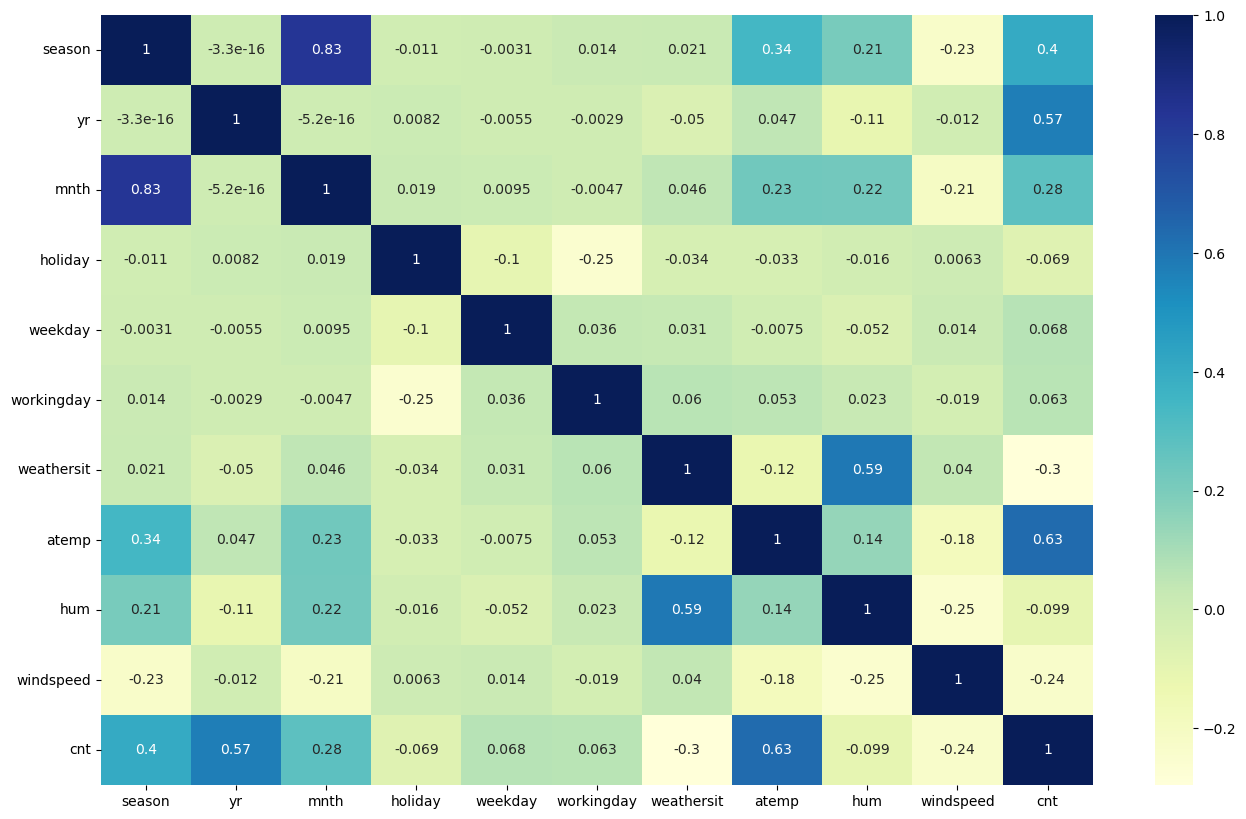

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikeRental.corr(),annot=True, cmap="YlGnBu")
plt.show()

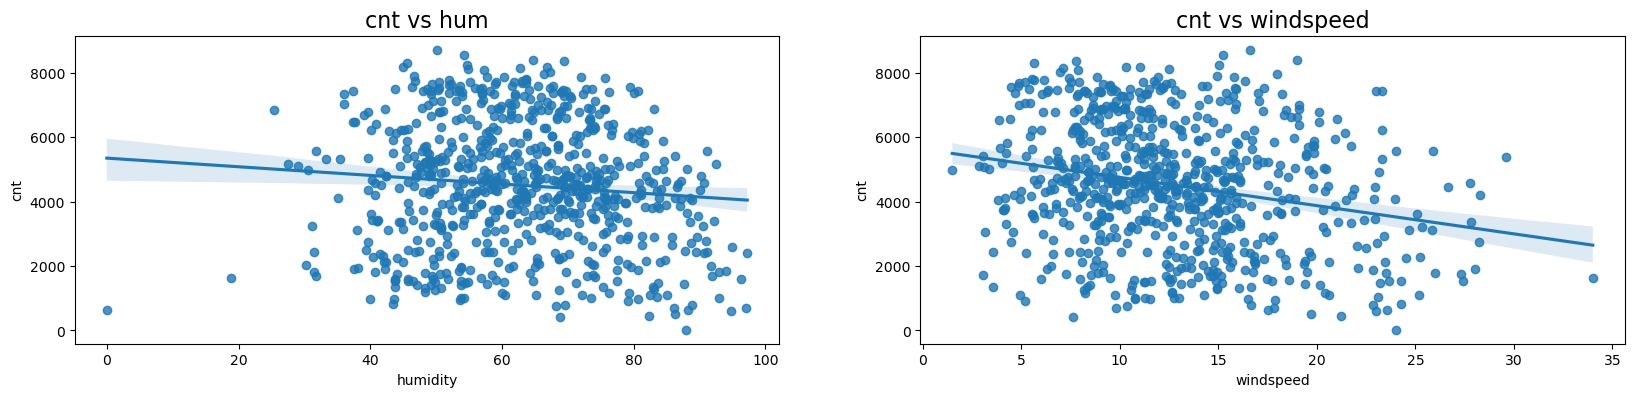

In [20]:
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title("cnt vs hum",fontsize=16)
sns.regplot(data=bikeRental,y="cnt",x="hum")
plt.xlabel("humidity")

plt.subplot(1,2,2)
plt.title("cnt vs windspeed",fontsize=16)
sns.regplot(data=bikeRental,y="cnt",x="windspeed")
plt.xlabel("windspeed")

plt.show()

From the above heatmap and the pairplots,  <br>
although from the pairplots the data looked scattered for windspeed & hum vs cnt <br>
but from the correlation heatmap we can understand that there is some correlation between windspeed & humidity Vs cnt. <br>
So, we will retain those features.

### Step-4 Encoding & Dummy Variables

In [21]:
bikeRental

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,11.58500,48.3333,23.500518,1796


In [22]:
bikeRental.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

First we will map the data of season, mnth, weekday to convert the numerical data to String variables to make it look like categorical<br>
&nbsp;&nbsp;&nbsp; season {1:'spring', 2:'summer', 3:'fall', 4:'winter'} <br>
&nbsp;&nbsp;&nbsp; month {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'} <br>
&nbsp;&nbsp;&nbsp; weekday {6: 'Monday',0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3:'Friday', 4:'Saturday', 5:'Sunday'} <br>

In [23]:
bikeRental[['season']] = bikeRental[['season']] .apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bikeRental[['mnth']] = bikeRental[['mnth']] .apply(lambda x : x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'}))
bikeRental[['weekday']] = bikeRental[['weekday']].apply(lambda x : x.map({6: 'Monday',0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3:'Friday', 4:'Saturday', 5:'Sunday'}))
bikeRental

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,2,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,2,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,1,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,1,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,2,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Sunday,1,2,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Monday,0,2,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Tuesday,0,1,11.58500,48.3333,23.500518,1796


#### Now that we got the categorical columns with the description instead of numbers we can split them to multiple dummy columns to help with the linear regression.

In [24]:
season = pd.get_dummies(bikeRental['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [25]:
month = pd.get_dummies(bikeRental['mnth'],drop_first=True)
month

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [26]:
weekday = pd.get_dummies(bikeRental['weekday'],drop_first=True)
weekday

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [27]:
# We are not using drop_first= True here because the definition itself has 4 defs for weather situation but we only have 3 values into our data, so to accomodate for future purposes we will retain 3 values

weathersit = pd.get_dummies(bikeRental['weathersit']) 
weathersit

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [28]:
# concat
bikeRental = pd.concat([bikeRental,season,month, weekday,weathersit],axis=1)
bikeRental

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3
0,spring,0,Jan,0,Monday,0,2,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tuesday,0,2,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,Thursday,1,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,2,11.33210,65.2917,23.458911,2114,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
726,spring,1,Dec,0,Sunday,1,2,12.75230,59.0000,10.416557,3095,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
727,spring,1,Dec,0,Monday,0,2,12.12000,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
728,spring,1,Dec,0,Tuesday,0,1,11.58500,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


**Important point to add here is that for all the three columns (season, mnth, weekday), while creating the dummies we have set an argument drop_first to True. This is because if there 'n' unique values for a columns then those 'n' variables or outcomes can be described by 'n-1' columns.**

In [29]:
bikeRental.drop(['season','mnth','weekday','weathersit'],inplace=True,axis=1)

In [30]:
bikeRental.columns

Index([        'yr',    'holiday', 'workingday',      'atemp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
              'Aug',        'Dec',        'Feb',        'Jan',        'Jul',
              'Jun',        'Mar',        'May',        'Nov',        'Oct',
              'Sep',     'Monday',   'Saturday',     'Sunday',   'Thursday',
          'Tuesday',  'Wednesday',            1,            2,            3],
      dtype='object')

In [31]:
bikeRental.nunique()

yr              2
holiday         2
workingday      2
atemp         689
hum           594
windspeed     649
cnt           695
spring          2
summer          2
winter          2
Aug             2
Dec             2
Feb             2
Jan             2
Jul             2
Jun             2
Mar             2
May             2
Nov             2
Oct             2
Sep             2
Monday          2
Saturday        2
Sunday          2
Thursday        2
Tuesday         2
Wednesday       2
1               2
2               2
3               2
dtype: int64

### Step-5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [32]:
df_train, df_test = train_test_split(bikeRental, train_size = 0.7, test_size = 0.3, random_state = 100)

We will scale only the numeric columns of the data using Min-Max scaler

In [33]:
scaler = MinMaxScaler()

In [34]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [35]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


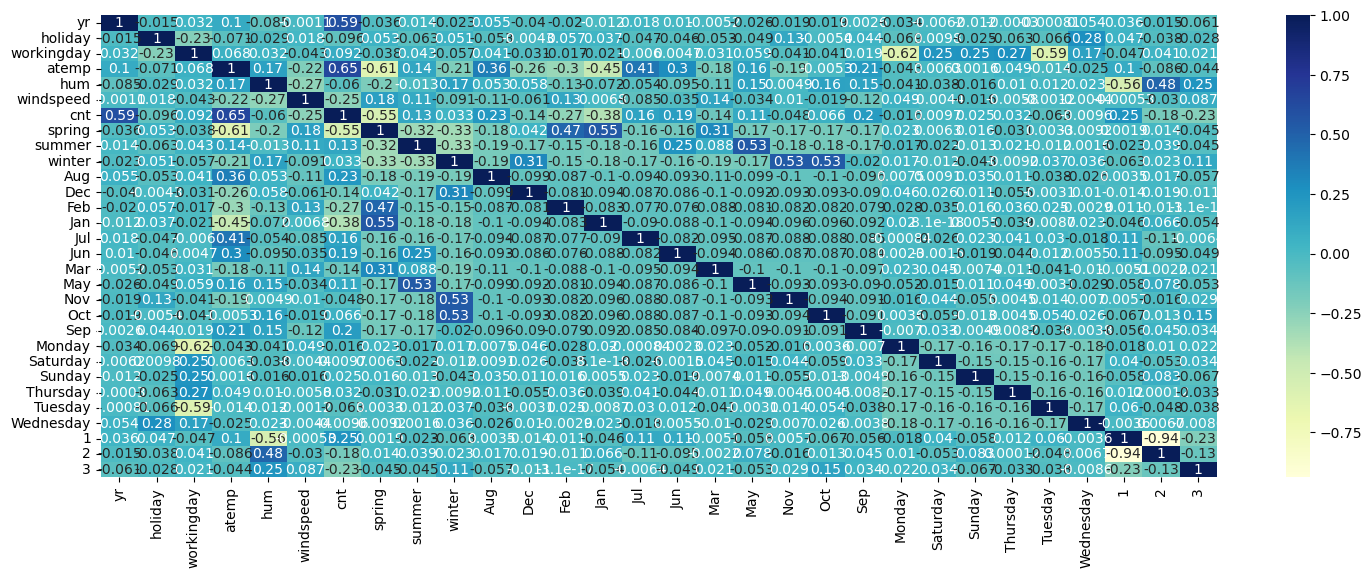

In [36]:
plt.figure(figsize=(18,6))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Step-6: Feature Engineering
*Since there are a lot of columns, and performing the linear regression manually will be a tedious job. <br>*
*So we will follow a hybrid approach. <br>*
*First, we will use RFE(Recursive Feature Elimination) to perform the linear regression and identify 15 significant columns. <br>*
*Then we can manually add/delete features as we see fit.*

In [37]:
# From the training data we now extract the features and target variables
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
X_train

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.762183,0.605840,0.355596,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.824359,0.679690,0.187140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
53,0,0,1,0.218747,0.435939,0.111379,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.223544,0.577930,0.431816,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [39]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [42]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()

lr.fit(X_train, y_train)
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [110]:
# The top 15 columns we will consider further for manual feature selection are given by support_ method in RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Jul', 'Sep', 'Monday', 'Tuesday', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
# Features that are discarded via RFE
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

In [48]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols_rfe]

**Using the features/columns obtained via RFE we build a model using StatsModel for detailed analysis**

#### Linear Regression Model Training - Initial features obtained from RFE

In [49]:
# Adding a constant variable || For building a model via statsmodel we need to make sure we add a constant term manually
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.45e-188
Time:                        23:29:08   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1291      0.023      5.655   

From the initial model we can see that r-squared and Adj r-squared values are almost similar, but let also check for the VIF to check for collinearity

In [51]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
11,Monday,inf
12,Tuesday,inf
13,weathersit_1,inf
14,weathersit_2,inf
15,weathersit_3,inf
4,atemp,2.92
7,spring,2.49
5,hum,1.90


From above we can see for many features the VIF is infinite, which means there is a heavy correlation among features/variables. <br>
Let's try dropping some features and check whether the correlation goes down.

#### Linear Regression Model Training - Iteration 1

In [52]:
# First let's drop holiday, as the VIF is very high and also the p-value >0.05 and retrain the model
X_train_rfe.drop(["holiday"], axis = 1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.45e-188
Time:                        23:33:44   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1036      0.033      3.152   

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,weathersit_1,inf
13,weathersit_2,inf
14,weathersit_3,inf
2,workingday,9.07
10,Monday,6.06
11,Tuesday,5.74
3,atemp,2.92
6,spring,2.49
4,hum,1.90
7,winter,1.71


**Although by dropping *holiday* feature we didn't observe any drop in the r-squared & adj. r-squared value of the model so we can have it dropped from the final features list**

#### Linear Regression Model Training - Iteration 2

In [56]:
#Still the VIF is inf for weathersit_1, weathersit_2, weathersit_3. Let's also drop weathersit_1 and rerun the model
X_train_rfe.drop(['weathersit_1'],inplace=True,axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.45e-188
Time:                        23:35:54   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2398      0.040      5.994   

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.28
2,workingday,9.07
10,Monday,6.06
11,Tuesday,5.74
3,atemp,2.92
6,spring,2.49
4,hum,1.90
7,winter,1.71
12,weathersit_2,1.57
8,Jul,1.29


Now that we dropped some of the features, the VIF also considerably went down for other variables as well. <br>
We can now try to drop some more columns bcas still there are 13 features and the VIF of some of the variables is still significantly high although their corresponding p-value is less than 0.05. <br>
We will do it carefully inspecting after each iteration to make sure that our models performance don't drastically go down because of one variable which it might have high correlation with. <br>
Still by dropping the *weathersit_1* feature the r-squared & adj. r-squared didn't drop but the VIF of the features has considerably come down. So we can proceed to drop the *weathersit_1* feature from the final model

#### Linear Regression Model Training - Iteration 3

In [58]:
# Let's try to drop workingday because it has a high VIF of 9
X_train_rfe.drop(['workingday'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.43e-186
Time:                        23:39:58   Log-Likelihood:                 500.16
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3366      0.032     10.657   

In [59]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.20
2,atemp,2.91
5,spring,2.49
3,hum,1.90
6,winter,1.71
11,weathersit_2,1.57
7,Jul,1.29
12,weathersit_3,1.25
4,windspeed,1.18
8,Sep,1.10


#### Linear Regression Model Training - Iteration 4

In [60]:
# If we observe the above model, we can see that the VIF is under control but there are some features whose p-value>0.05.input
# Now let's drop Monday feature, because the p-value is very high
X_train_rfe.drop(['Monday'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.84e-187
Time:                        23:40:50   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     498   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3400      0.031     10.806   

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.69
2,atemp,2.91
5,spring,2.49
3,hum,1.90
6,winter,1.70
10,weathersit_2,1.57
7,Jul,1.29
11,weathersit_3,1.25
4,windspeed,1.18
8,Sep,1.10


**We will stop the feature engineering here as the features that are remaining seem significant and the same is reflected in the p-values and the VIF is also quite less than 5 & also p(F-statistic) is very low which means that the fit is not by chance.**

In [63]:
X_train_rfe.columns

# Now only 11 features are remaining with constant value term.

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Jul',
       'Sep', 'Tuesday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

The y function i.e., cnt can be represented as <br>
cnt = 0.34 + 0.2318 * yr + 0.4969 * atemp - 0.1529 * hum - 0.1551 * windspeed - 0.1154 * spring + 0.0472 * winter - 0.0725 * Jul + 0.0582 * Sep - 0.0419 * Tuesday - 0.0571 * weathersit_2 - 0.2400 * weathersit_3

### Step-7: Residual Analysis

We will now predict the y (cnt) values using the above trained linear model.

We perform this to validate the assumptions of the model and hence the reliability for inference

In [64]:
y_train_pred = lm.predict(X_train_rfe)
y_train_pred

653    0.733383
576    0.728046
426    0.479974
728    0.335126
482    0.602978
         ...   
526    0.745633
578    0.848442
53     0.249389
350    0.285870
79     0.300221
Length: 510, dtype: float64

In [119]:
res = y_train-y_train_pred
res

653    0.130860
576    0.099611
426   -0.014719
728   -0.131031
482   -0.120005
         ...   
526    0.018518
578   -0.015607
53    -0.031373
350    0.026716
79    -0.063796
Length: 510, dtype: float64

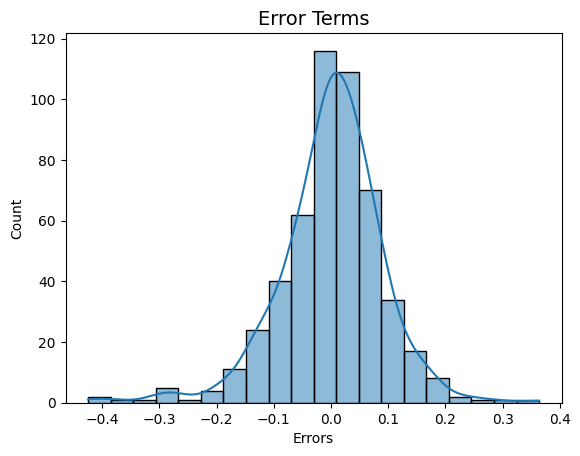

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20, kde=True)
plt.title('Error Terms', fontsize = 14)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.show()

**As we can observe from the above errors distribution graph, the values of errors in y follows a normal distribution with mean at 0**

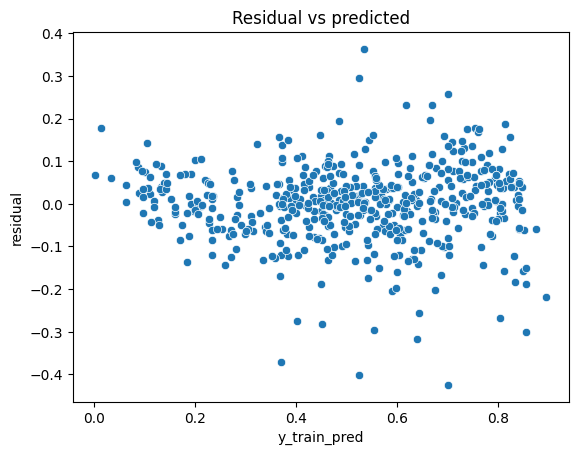

In [118]:
sns.scatterplot(x=y_train_pred, y=(y_train-y_train_pred) ) 
plt.xlabel('y_train_pred', fontsize = 10)
plt.ylabel('residual', fontsize = 10)   
plt.title('Residual vs predicted')
plt.show()

**We see that the residuals are randomly scattered around the center line of zero, with no obvious non-random pattern and with a variance almost 0**

Since the model follows all the assumptions of Linear Regression, we can use the above linear regression model to make inferences

### Step-8: Predictions and evaluations on test data
But first we need to scale the test data as well using MinMaxScaling. We will use the MinMaxScaler that we fit previously and using the same we will transform the test set data.

In [67]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
trained_cols = X_train_rfe.columns
trained_cols = trained_cols.drop(['const'])
trained_cols

Index(['yr', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Jul', 'Sep',
       'Tuesday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [71]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[trained_cols]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_pred = lm.predict(X_test_rfe)
y_test_pred

184    0.479242
535    0.873314
299    0.396743
221    0.615679
152    0.577002
         ...   
400    0.325488
702    0.713799
127    0.474723
640    0.767974
72     0.279745
Length: 219, dtype: float64

#### Model Evaluation

Text(0, 0.5, 'y_test_pred')

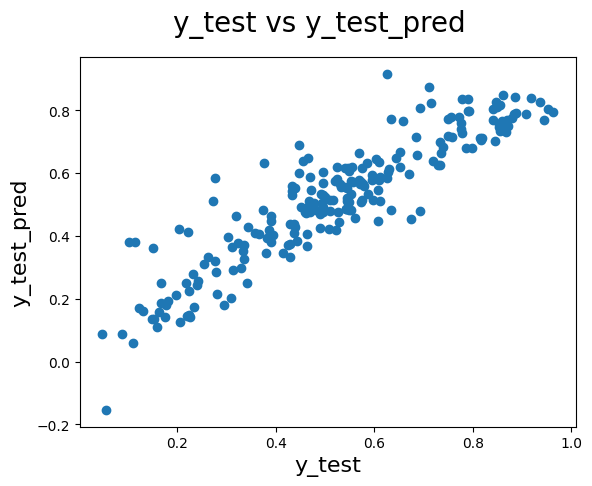

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

We can observe that y_test & y_test_pred follows almost a straight line. i.e error term does not vary much as the value of the predictor variable changes & will have almost constant variance.

In [79]:
print(r2_score(y_train,y_train_pred),' -> training data r-squared value')
print(r2_score(y_test,y_test_pred),'  -> test data r-squared value')

0.8359501618124403  -> training data r-squared value
0.822029602241193   -> test data r-squared value


---

From above we can observe that the r-squared value for test data is almost close to the training data r-squared. Which means that our model will perform good for more unseen data.

__0.836  -> training data r-squared value__ <br>
__0.822  -> test data r-squared value__

---

In [80]:
lm.params.values

array([ 0.33998121,  0.23179254,  0.49686998, -0.15287637, -0.15508607,
       -0.1153629 ,  0.04721766, -0.07252311,  0.05823603, -0.04185002,
       -0.05708019, -0.24004731])

In [81]:
lm.params.sort_values()

weathersit_3   -0.240047
windspeed      -0.155086
hum            -0.152876
spring         -0.115363
Jul            -0.072523
weathersit_2   -0.057080
Tuesday        -0.041850
winter          0.047218
Sep             0.058236
yr              0.231793
const           0.339981
atemp           0.496870
dtype: float64

Top 3 influencing features are (in decreasing order of magnitude i.e., absolute value of co-efficients)
1. atemp - feeling temperature in celsius
2. weathersit_3 (i.e., Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
3. year - (2018, 2019) - From our EDA, we have also observed the same, that is a significant difference of count over the years 

Note: Although weathersit_3 has negative value, but it is still considered as negatively influencing the target variable i.e., cnt ('count'). Which makes sense because people don't like to go out on bike when the weather conditions are **bad**.

_`Interpretation`_: <br>
To improve the demand for shared bikes
 - Company should focus on increasing the bikes count/availability during September & decrease during Jul
 - Company should focus on increasing the bikes count/availability during winter & decrease during spring
 - Yearly demand of the boom bikes rental went up significantly from 2018 to 2019 and is one of the major influencing factors in the model building as well. So the company should atleast maintain what all things that they did previously.
 - During the moderate & bad weather conditions (weathersit_2 & weathersit_3) there is a decreased demand in the bike rental and the demand is affected negatively.

BoomBikes company can try to increase the demand during the off season by introducing offers, promotions etc...

Comments / Improvements for additional analysis:

---

1. Weathersit_1 was deleted while performing linear regression. But we can try to retain it and drop other features and see how our model changes and ultimately if our accuracy increases.
2. As we saw in the categorical analysis wrt cnt variable, the value of cnt is higher for fall as compared to spring, summer or winter. But while creating dummy variables fall feature was lost in the making. So we can rerun the whole analysis with by dropping other unique value from that season feature.

Additional Analysis :

---

As we saw above, weathersit_3 is negatively influencing the cnt output, and since weathersit_3 is a bad weather condition as discussed earlier. Let's try to add weathersit_1 and then delete either weathersit_3 or weathersit_2 based on the p-value and VIF

In [86]:
X_train_weathersit_1 = X_train[['weathersit_1']]
X_train_weathersit_1

,weathersit_1
653,1
576,1
426,0
728,1
482,0
...,...
526,0
578,1
53,1
350,0


In [104]:
X_train_rfe_new = pd.concat([X_train_rfe,X_train_weathersit_1],axis=1)
X_train_rfe_new

,const,yr,atemp,hum,windspeed,spring,winter,Jul,Sep,Tuesday,weathersit_2,weathersit_3,weathersit_1
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,1
576,1.0,1,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,1
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,1
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.762183,0.605840,0.355596,0,0,0,0,0,1,0,0
578,1.0,1,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,1
53,1.0,0,0.218747,0.435939,0.111379,1,0,0,0,0,0,0,1
350,1.0,0,0.223544,0.577930,0.431816,0,1,0,0,0,1,0,0


In [105]:
lm_new = sm.OLS(y_train,X_train_rfe_new).fit()  
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.84e-187
Time:                        19:59:54   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     498   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1807      0.027      6.721   

In [106]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\CustInstallation\epgpEnv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,weathersit_2,inf
11,weathersit_3,inf
12,weathersit_1,inf
2,atemp,2.91
5,spring,2.49
3,hum,1.90
6,winter,1.70
7,Jul,1.29
4,windspeed,1.18
8,Sep,1.10


In [107]:
# since the VIF of weathersit_2 is inf, we will drop it first and rerun our model.
X_train_rfe_new.drop(['weathersit_2'],inplace=True, axis=1)
lm_new = sm.OLS(y_train,X_train_rfe_new).fit()  
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.84e-187
Time:                        20:00:48   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     498   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2829      0.036      7.946   

In [108]:
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.43
2,atemp,2.91
5,spring,2.49
3,hum,1.90
6,winter,1.70
11,weathersit_1,1.62
7,Jul,1.29
4,windspeed,1.18
10,weathersit_3,1.12
8,Sep,1.10


In [100]:
lm_new.params.sort_values()

hum            -0.201343
windspeed      -0.182872
spring         -0.112401
Jul            -0.080928
Tuesday        -0.038340
winter          0.042544
Sep             0.054895
weathersit_1    0.062757
yr              0.233677
const           0.307901
atemp           0.509318
dtype: float64

_`Inference`_:
We checked whether adding the weathersit_1 (ie, most suitable) weather condition would increase the accuracy by significant amount, but still the r-squared value at the end was the same as before. So, we can proceed either with either of the models.